# Q2: Downloading the dataset with the Lidarseg file

In [1]:
!mkdir -p /home/rmacher/Perception_8930/data/sets/nuscenes

!wget https://www.nuscenes.org/data/v1.0-mini.tgz  # Download the nuScenes mini split.

!tar -xf v1.0-mini.tgz -C /home/rmacher/Perception_8930/data/sets/nuscenes

wget: /software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2019.10-v5cuhr6keyz5ryxcwvv2jkzfj2gwrj4a/lib/libuuid.so.1: no version information available (required by wget)
--2021-01-15 13:08:35--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 143.204.147.104, 143.204.147.50, 143.204.147.30, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|143.204.147.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz         8%[>                   ] 327.99M  55.2MB/s    eta 65s    ^C

gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [1]:
!wget https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2
    
!tar -xf nuScenes-lidarseg-mini-v1.0.tar.bz2 -C /home/rmacher/Perception_8930/data/sets/nuscenes

wget: /software/spackages/linux-centos8-x86_64/gcc-8.3.1/anaconda3-2019.10-v5cuhr6keyz5ryxcwvv2jkzfj2gwrj4a/lib/libuuid.so.1: no version information available (required by wget)
--2021-01-15 14:10:14--  https://www.nuscenes.org/data/nuScenes-lidarseg-mini-v1.0.tar.bz2
Resolving www.nuscenes.org (www.nuscenes.org)... 143.204.147.104, 143.204.147.25, 143.204.147.30, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|143.204.147.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1819477 (1.7M) [application/x-tar]
Saving to: ‘nuScenes-lidarseg-mini-v1.0.tar.bz2’

nuScenes-lidarseg-m 100%[===================>]   1.73M  --.-KB/s    in 0.1s    

2021-01-15 14:10:14 (12.2 MB/s) - ‘nuScenes-lidarseg-mini-v1.0.tar.bz2’ saved [1819477/1819477]



In [42]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='/home/rmacher/Perception_8930/data/sets/nuscenes')

Loading NuScenes tables for version v1.0-mini...
Loading nuScenes-lidarseg...
32 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
404 lidarseg,
Done loading in 0.585 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [43]:
my_scene = nusc.scene[0]

In [44]:
# sample is an annotated frame, timestamps from all the sensors sync every half a second (annotated keyframe)
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)

# Q3: Visualizing data using the nuscenes devkit

In [45]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor]) #sample data from the front camera
cam_front_data
calibrated_sensor_token = cam_front_data['calibrated_sensor_token'] 
nusc.get('calibrated_sensor', calibrated_sensor_token)

{'token': '1d31c729b073425e8e0202c5c6e66ee1',
 'sensor_token': '725903f5b62f56118f4094b46a4470d8',
 'translation': [1.70079118954, 0.0159456324149, 1.51095763913],
 'rotation': [0.4998015430569128,
  -0.5030316162024876,
  0.4997798114386805,
  -0.49737083824542755],
 'camera_intrinsic': [[1266.417203046554, 0.0, 816.2670197447984],
  [0.0, 1266.417203046554, 491.50706579294757],
  [0.0, 0.0, 1.0]]}

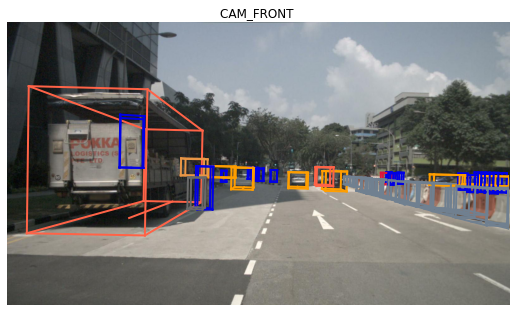

In [46]:
nusc.render_sample_data(cam_front_data['token'])

In [47]:
sensor = 'RADAR_FRONT'
radar_front_data = nusc.get('sample_data', my_sample['data'][sensor]) #sample data from the front camera
radar_front_data
# calibrated_sensor_token = radar_front_data['calibrated_sensor_token'] 
# nusc.get('calibrated_sensor', calibrated_sensor_token)

{'token': '37091c75b9704e0daa829ba56dfa0906',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': '37091c75b9704e0daa829ba56dfa0906',
 'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
 'timestamp': 1532402927664178,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd',
 'prev': '',
 'next': 'f0b8593e08594a3eb1152c138b312813',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

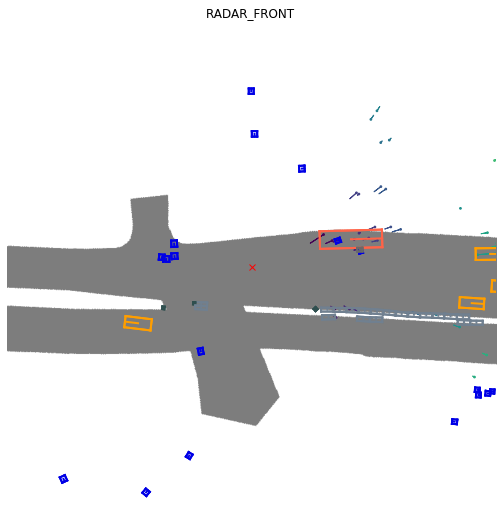

In [48]:
nusc.render_sample_data(radar_front_data['token'])

In [49]:
sensor = 'LIDAR_TOP'
lidar_top_data = nusc.get('sample_data', my_sample['data'][sensor]) #sample data from the top lidar
lidar_top_data
calibrated_sensor_token = lidar_top_data['calibrated_sensor_token'] 
nusc.get('calibrated_sensor', calibrated_sensor_token)

{'token': 'a183049901c24361a6b0b11b8013137c',
 'sensor_token': 'dc8b396651c05aedbb9cdaae573bb567',
 'translation': [0.943713, 0.0, 1.84023],
 'rotation': [0.7077955119163518,
  -0.006492242056004365,
  0.010646214713995808,
  -0.7063073142877817],
 'camera_intrinsic': []}

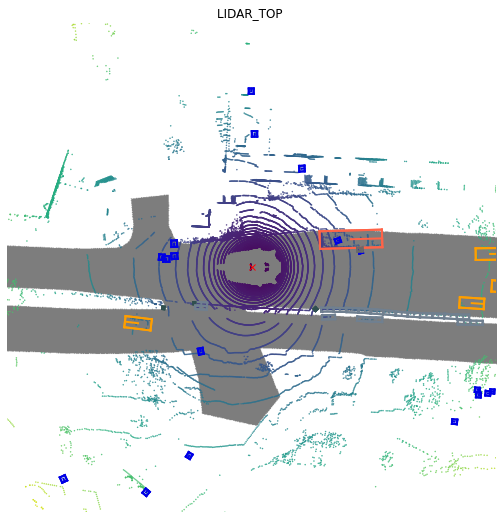

In [50]:
nusc.render_sample_data(lidar_top_data['token'], nsweeps = 5, underlay_map=True)

# Q5: Rendering radar and lidar pcd on the camera image and printing the calibration information

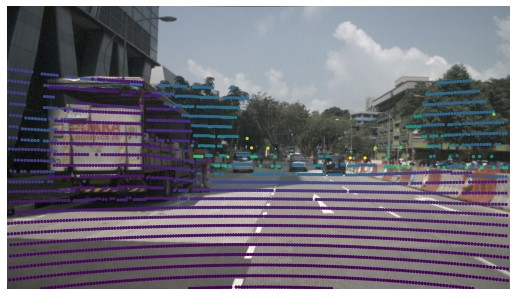

In [51]:
#rendering point cloud data on image

nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

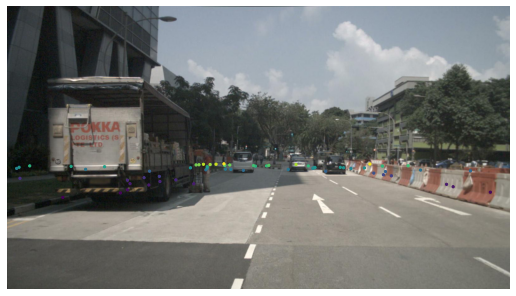

In [52]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT')

In [53]:
radar_to_ego = nusc.get('calibrated_sensor', radar_front_data['calibrated_sensor_token'])
translation_mat = radar_to_ego['translation']
rotation_mat = radar_to_ego['rotation']
print("The translation matrix between radar and ego vehicle", translation_mat)
print("The rotation matrix between radar and ego vehicle", rotation_mat)

The translation matrix between radar and ego vehicle [3.412, 0.0, 0.5]
The rotation matrix between radar and ego vehicle [0.9999984769132877, 0.0, 0.0, 0.0017453283658983088]


In [54]:
ego_to_global = nusc.get('ego_pose', radar_front_data['ego_pose_token'])
translation_mat = ego_to_global['translation']
rotation_mat = ego_to_global['rotation']
print("The translation matrix between ego frame and global frame", translation_mat)
print("The rotation matrix between ego frame and global frame", rotation_mat)

The translation matrix between ego frame and global frame [411.25243634487725, 1180.7511754315697, 0.0]
The rotation matrix between ego frame and global frame [0.5721129977125774, -0.0014962022442161157, 0.011922678049447764, -0.8200867813684729]


In [55]:
global_to_global = nusc.get('ego_pose', cam_front_data['ego_pose_token'])
translation_mat = global_to_global['translation']
rotation_mat = global_to_global['rotation']
print("The translation matrix between global frame of the sweep and global frame of the camera", translation_mat)
print("The rotation matrix between global frame of the sweep and global frame of the camera", rotation_mat)

The translation matrix between global frame of the sweep and global frame of the camera [411.4199861830012, 1181.197175631848, 0.0]
The rotation matrix between global frame of the sweep and global frame of the camera [0.5720063498929273, -0.0021434844534272707, 0.011564094980151613, -0.8201648693182716]


In [56]:
cam_to_global = nusc.get('calibrated_sensor', cam_front_data['calibrated_sensor_token'])
translation_mat = cam_to_global['translation']
rotation_mat = cam_to_global['rotation']
print("The translation matrix between camera and global frame", translation_mat)
print("The rotation matrix between camera and global frame", rotation_mat)

The translation matrix between camera and global frame [1.70079118954, 0.0159456324149, 1.51095763913]
The rotation matrix between camera and global frame [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]


In [57]:
lidar_to_ego = nusc.get('calibrated_sensor', lidar_top_data['calibrated_sensor_token'])
translation_mat = lidar_to_ego['translation']
rotation_mat = lidar_to_ego['rotation']
print("The translation matrix between lidar and ego vehicle", translation_mat)
print("The rotation matrix between lidar and ego vehicle", rotation_mat)

The translation matrix between lidar and ego vehicle [0.943713, 0.0, 1.84023]
The rotation matrix between lidar and ego vehicle [0.7077955119163518, -0.006492242056004365, 0.010646214713995808, -0.7063073142877817]


In [58]:
ego_to_global = nusc.get('ego_pose', lidar_top_data['ego_pose_token'])
translation_mat = ego_to_global['translation']
rotation_mat = ego_to_global['rotation']
print("The translation matrix between ego frame and global frame", translation_mat)
print("The rotation matrix between ego frame and global frame", rotation_mat)

The translation matrix between ego frame and global frame [411.3039349319818, 1180.8903791765097, 0.0]
The rotation matrix between ego frame and global frame [0.5720320396729045, -0.0016977771610471074, 0.011798001930183783, -0.8201446642457809]


In [59]:
global_to_global = nusc.get('ego_pose', cam_front_data['ego_pose_token'])
translation_mat = global_to_global['translation']
rotation_mat = global_to_global['rotation']
print("The translation matrix between global frame of the sweep and global frame of the camera", translation_mat)
print("The rotation matrix between global frame of the sweep and global frame of the camera", rotation_mat)

The translation matrix between global frame of the sweep and global frame of the camera [411.4199861830012, 1181.197175631848, 0.0]
The rotation matrix between global frame of the sweep and global frame of the camera [0.5720063498929273, -0.0021434844534272707, 0.011564094980151613, -0.8201648693182716]


In [60]:
cam_to_global = nusc.get('calibrated_sensor', cam_front_data['calibrated_sensor_token'])
translation_mat = cam_to_global['translation']
rotation_mat = cam_to_global['rotation']
print("The translation matrix between camera and global frame", translation_mat)
print("The rotation matrix between camera and global frame", rotation_mat)

The translation matrix between camera and global frame [1.70079118954, 0.0159456324149, 1.51095763913]
The rotation matrix between camera and global frame [0.4998015430569128, -0.5030316162024876, 0.4997798114386805, -0.49737083824542755]
